In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


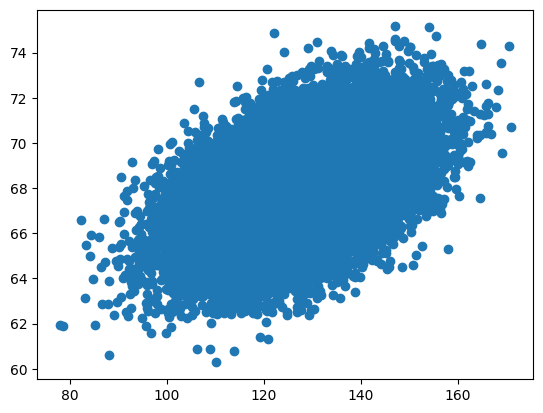

In [10]:
# prompt: scatter the df usisng plt.scatter

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)']) #replace column1 and column2 with actual column names



In [11]:
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


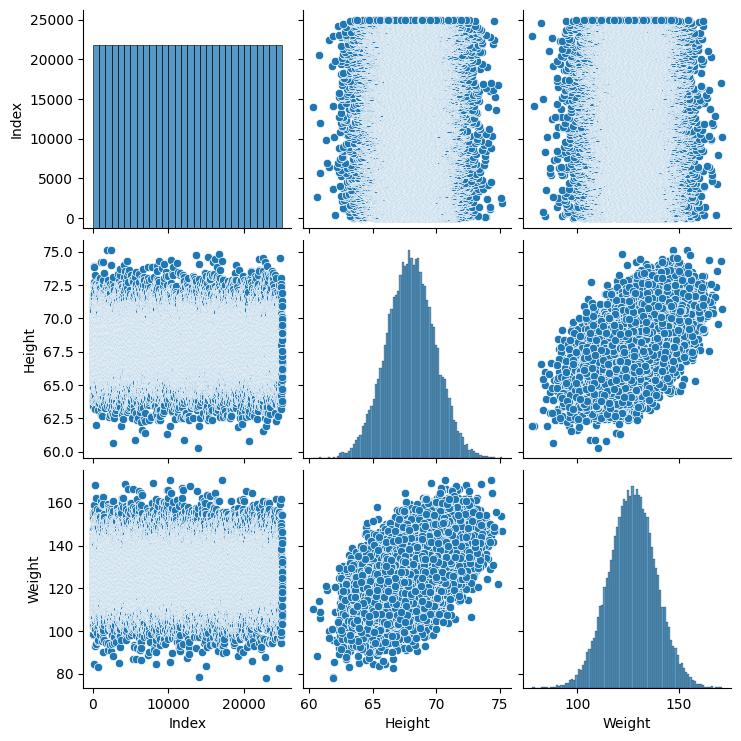

In [14]:
import seaborn as sns
sns.pairplot(df)



In [15]:
##independent and dependant features
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [17]:
# prompt: remove index column from data

df = df.iloc[:, 1:]
df.head()


,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [18]:
# prompt: make all the data in integer

df = df.astype(int)
df.head()


,Height,Weight
0,65,112
1,71,136
2,69,153
3,68,142
4,67,144


In [27]:
##independant and depandent
x=df[['Weight']] ##independant feature should be a df
y=df['Height'] ##dependant feature should be a series

In [23]:
np.array(x).shape

(25000, 1)

In [24]:
x.head()

,Weight
0,112
1,136
2,153
3,142
4,144


In [25]:
x_series=df['Weight']
np.array(x_series).shape

(25000,)

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [29]:
x_train.shape

(16750, 1)

In [30]:
##Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x_train

array([[ 0.5550689 ],
       [-1.59720762],
       [ 0.1246136 ],
       ...,
       [-0.56411489],
       [ 0.72725103],
       [-0.39193277]])

In [35]:
##Apply Simple Linear regression Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)
regressor.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [38]:
print('Coefficent or slope: ',regressor.coef_)

Coefficent or slope:  [0.95281841]


In [39]:
print('Intercept  : ',regressor.intercept_)

Intercept  :  67.50202985074627


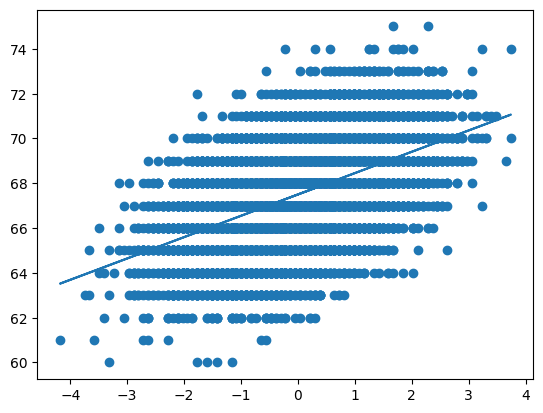

In [40]:
##plot training data plot for best ftit
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train))

y_pred_test=67.5+0.95(x_test)


In [44]:
##predication for test data
y_pred=regressor.predict(x_test)

In [42]:
##performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [45]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [46]:
print(mse)
print(mae)
print(rmse)

2.7803941357927635
1.3289391549726506
1.6674513893342628


##R square
r^2=1-SSR/SST

In [47]:
from sklearn.metrics import r2_score


In [49]:
score=r2_score(y_test,y_pred)
print(score)

0.2515458715816924


In [50]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.25145512787068147

In [51]:
##OLS Linear Regression

In [53]:
import statsmodels.api as sm

In [54]:
model=sm.OLS(y_train,x_train).fit()

In [56]:
predication=model.predict(x_test)

In [57]:
predication


array([ 0.61090902, -1.27576139,  0.69293817, ...,  1.26714221,
        0.11873413, -1.11170309])

In [59]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.335
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                      0.0678
Time:                        07:30:10   Log-Likelihood:                         -94326.
No. Observations:               16750   AIC:                                  1.887e+05
Df Residuals:                   16749   BIC:                                  1.887e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
##predicaation for new data
X_new = scaler.transform([[73]])

# Predict using your regressor
prediction = regressor.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
